## Feature engineering

It can be divided into essentially 2 parts.

1. Feature preprocessing (it depends on the model type and mainly if it is **non-tree-based or tree-based**)
2. Feature generation.

![](images/classifier_comparison.png)

**Types of features:** Numeric, categorical, ordinal, datetime, coordinates

Here I list the best sources about feature engineering.

https://www.coursera.org/learn/competitive-data-science  
http://hamelg.blogspot.pe/2015/11/python-for-data-analysis-part-14.html  

## Most common examples of feature preprocessing

Cartesian -> Polar

In [197]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set_style("whitegrid")
# # Bigger font
sns.set_context("talk")
# # Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4
np.random.seed(123)

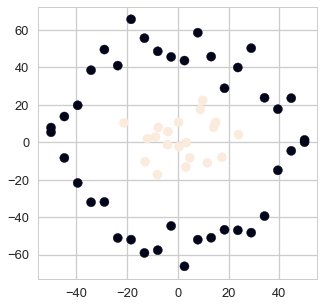

In [198]:
np.random.seed(123)
x = np.linspace(-50,50,20,endpoint=True)
y_1 = [np.sqrt(50*50 - i*i) + np.random.uniform(-20,20) for i in x]
y_2 = [-np.sqrt(50*50 - i*i) + np.random.uniform(-20,20) for i in x]

xy = np.array([np.random.multivariate_normal([0,0],[[100,0],[0,100]]).tolist() for i in range(20)])
x_inner, y_inner = xy[:,0], xy[:,1]

target = np.concatenate(([0 for _ in range(40)], [1 for _ in range(20)]))

df = pd.DataFrame({'x':np.concatenate((x,x,x_inner)), 'y':np.concatenate((y_1,y_2,y_inner)), 'target':target})
fig = plt.figure(figsize=(5,5))
plt.scatter(df.x, df.y, c=df.target)

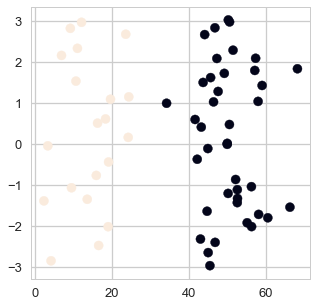

In [199]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

df_polar = pd.DataFrame([cart2pol(d.x,d.y) for i,d in df.iterrows()],columns=['x','y'])
fig = plt.figure(figsize=(5,5))
plt.scatter(df_polar.x, df_polar.y, c=df.target)